## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn')

In [3]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Load Dataset

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
import pprint
pprint.pprint(boston['DESCR'])

('.. _boston_dataset:\n'
 '\n'
 'Boston house prices dataset\n'
 '---------------------------\n'
 '\n'
 '**Data Set Characteristics:**  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value '
 '(attribute 14) is usually the target.\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index of 

In [7]:
print('Total baris data training:', boston['data'].shape[0])
print('Total kolom data training:', boston['data'].shape[1])

Total baris data training: 506
Total kolom data training: 13


In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Preprocessing

#### Dataset Boston Housing berasal dari informasi yang dikumpulkan oleh Layanan Sensus U.S. mengenai perumahan di wilayah Boston. Berikut ini adalah penjelasan tiap kolom pada dataset

1. CRIM - per capita crime rate by town (tingkat kejahatan per kapita menurut town)
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft. (proporsi tanah tempat tinggal yang diatas 25.000 kaki persegi)
3. INDUS - proportion of non-retail business acres per town. (proporsi bisnis non-ritel)
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) / berbatasan dengan sungai atau tidak
5. NOX - nitric oxides concentration (parts per 10 million) / konsentrasi nitric oxides atau polusi
6. RM - average number of rooms per dwelling (jumlah rataan kamar per tempat tinggal)
7. AGE - proportion of owner-occupied units built prior to 1940 (proporsi unit yang dibangun sebelum 1940 saat ini ditempati)
8. DIS - weighted distances to five Boston employment centres (jarak tempat ke 5 lima pusat bisnis di Boston)
9. RAD - index of accessibility to radial highways (aksesibilitas ke jalan raya yang menuju atau dari pusat kota)
10. TAX - full-value property-tax rate per 10,000 dollar (pajak properti)
11. PTRATIO - pupil-teacher ratio by town (rasio murid-guru)
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (Bk adalah proporsi orang kulit hitam)
13. LSTAT - % lower status of the population
14. (TARGET) MEDV - Median value of owner-occupied homes in 1000 dollar (nilai median dari rumah yang ditempati dalam 1000 dolar)

In [10]:
df_housing = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df_housing['MEDV'] = boston.target
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Understanding Data

In [ ]:
# mencari data yang kosong pada tiap kolom
df_housing.isnull().any()

In [ ]:
df_housing.describe()

## Data Visualization

#### Melihat sebaran data

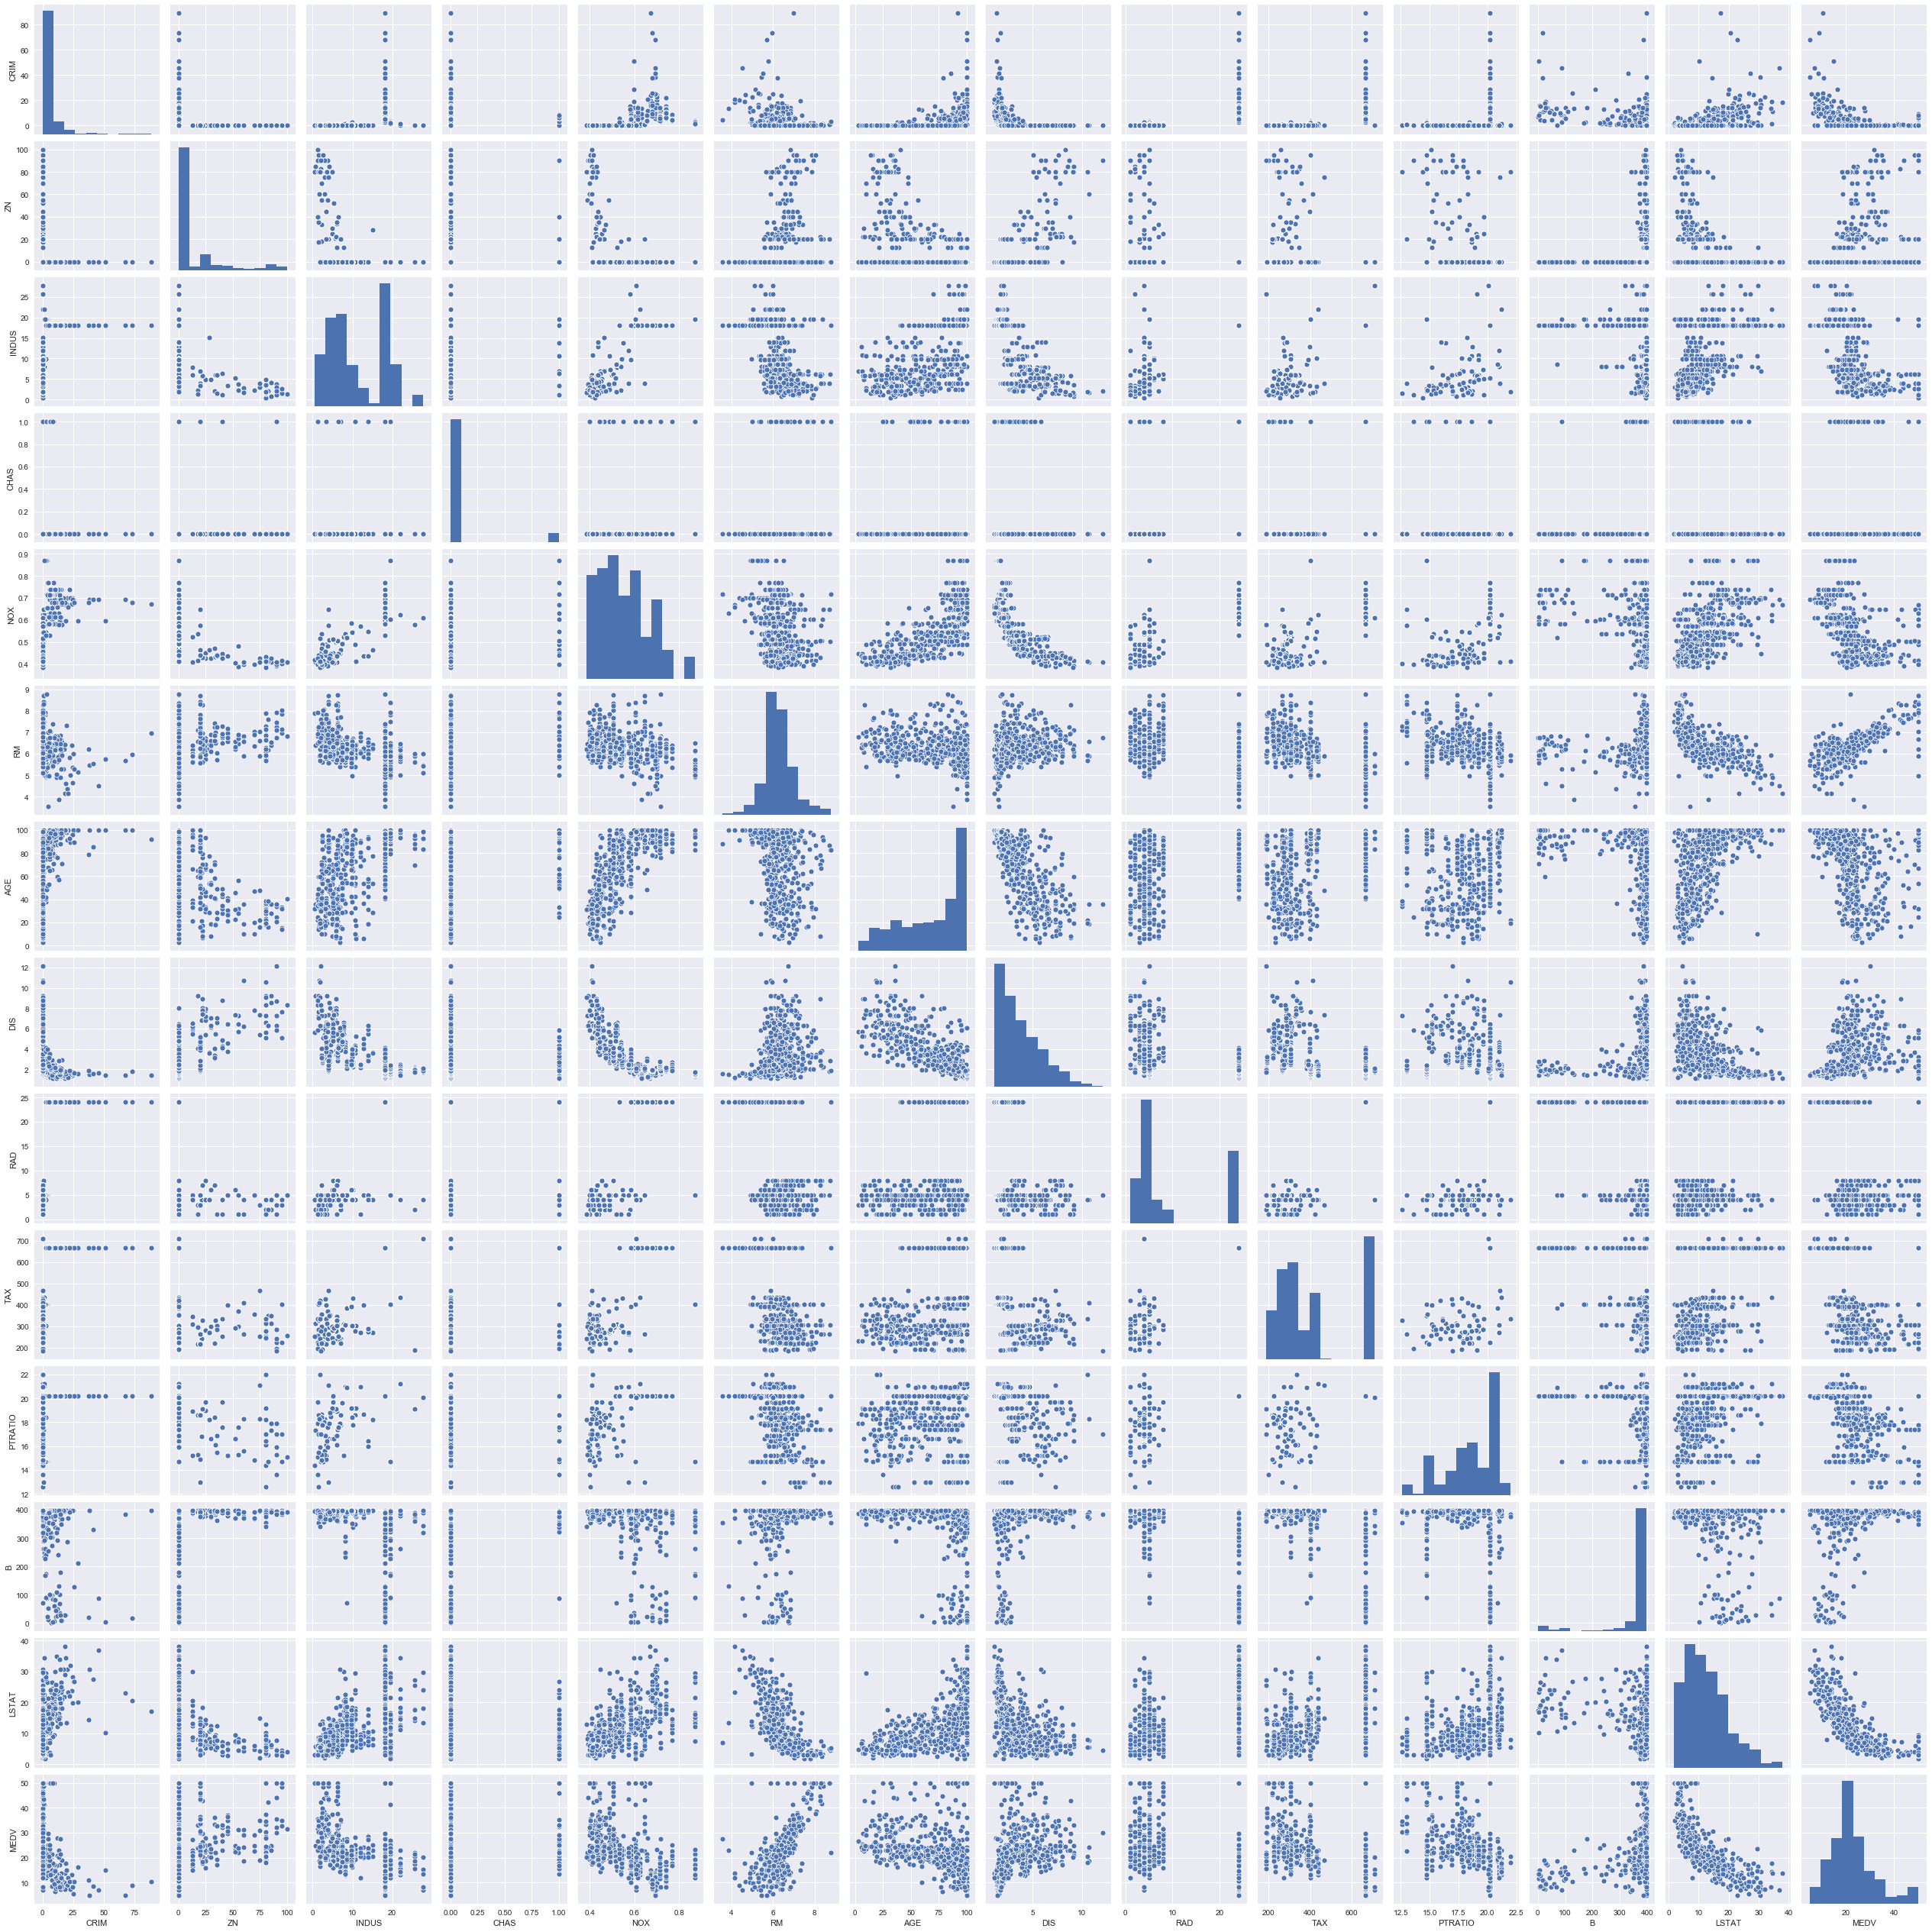

In [146]:
sns.pairplot(data=df_housing)
plt.show()

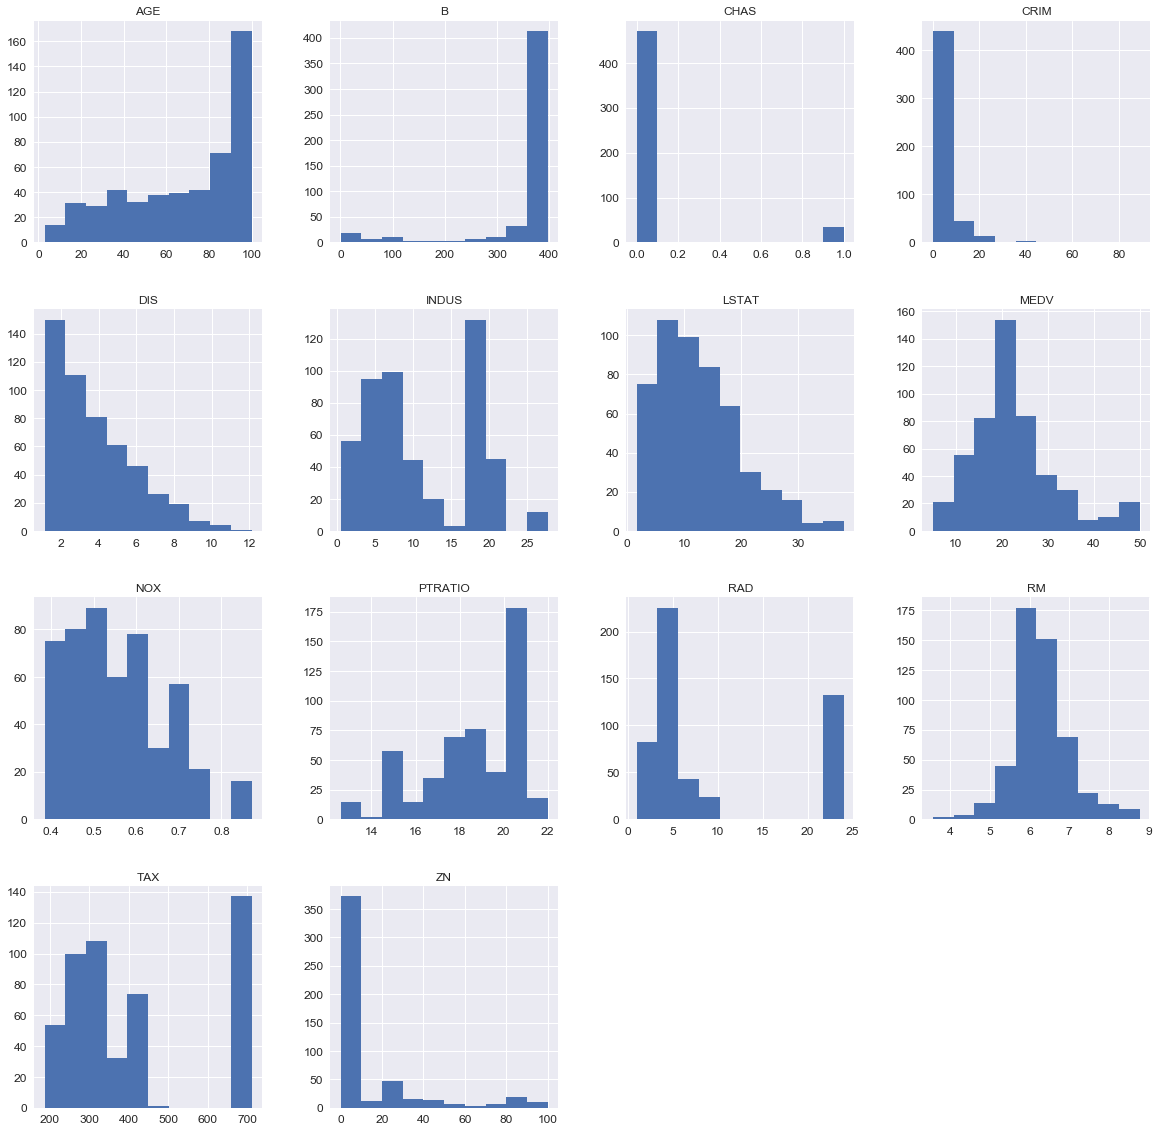

In [147]:
df_housing.hist(figsize=(20, 20), xlabelsize=12, ylabelsize=12);

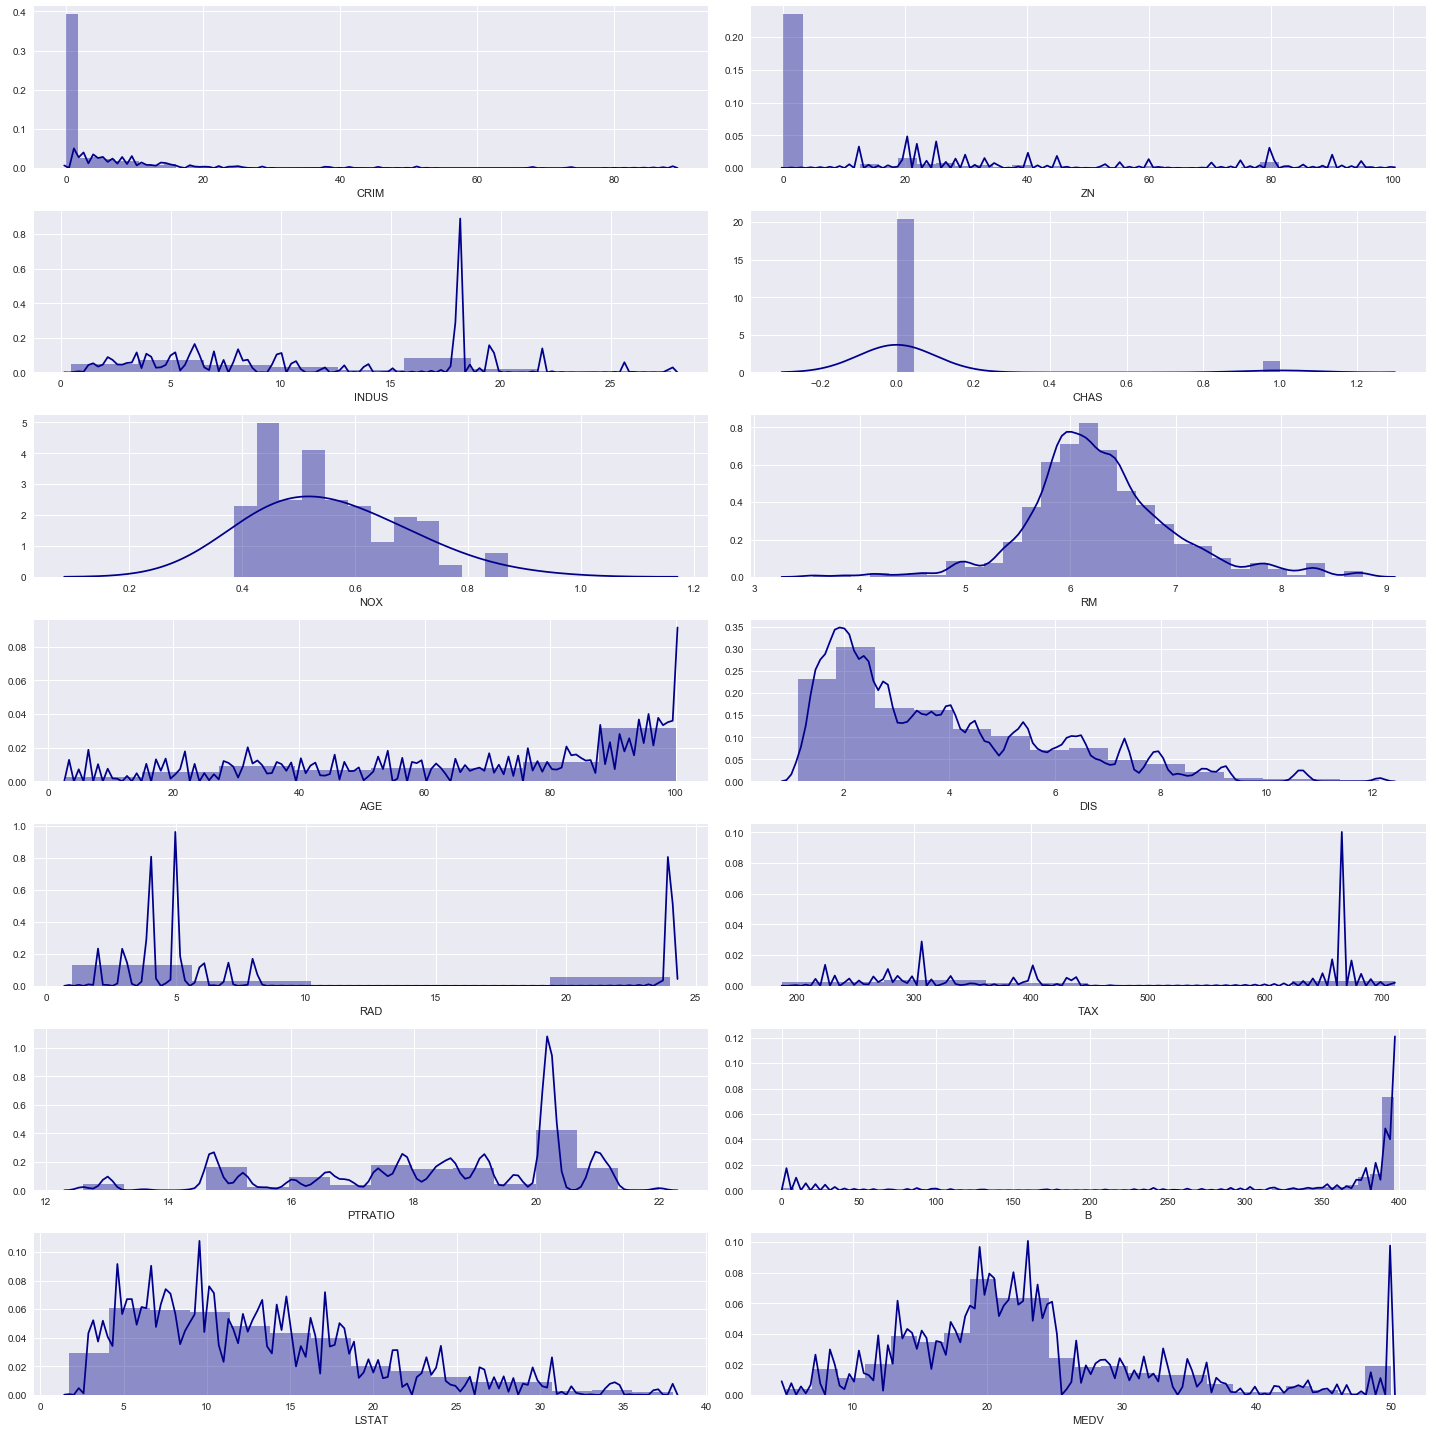

In [148]:
sns.set_color_codes()
rows = 7
cols = 2
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize= (20, 20))

col = df_housing.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df_housing[col[index]], ax = ax[i][j], kde=True, color="darkblue", kde_kws={'bw':0.1})
        index = index + 1
        
plt.tight_layout()

#### Visualisasi heatmap

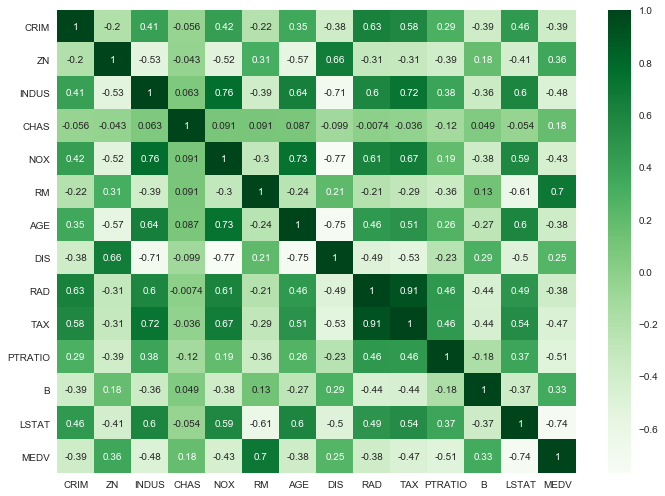

In [95]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(data=df_housing.corr(), annot=True, cmap="Greens")
plt.tight_layout()

## Linear Regression

### Split Data

In [12]:
Model_LR = df_housing.loc[:, ["LSTAT", "MEDV"]]

In [13]:
print(Model_LR)

     LSTAT  MEDV
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[506 rows x 2 columns]


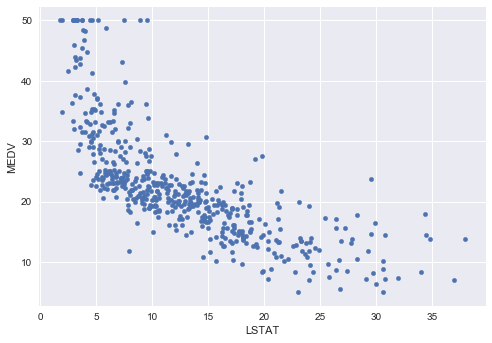

In [14]:
Model_LR.plot.scatter(x = "LSTAT", y= "MEDV")
plt.tight_layout
plt.show()

In [15]:
train_data, test_data = train_test_split(Model_LR, test_size=0.3, random_state=20)

In [16]:
print('Total Training: ', train_data.shape)
print('Total Testing: ', test_data.shape)

Total Training:  (354, 2)
Total Testing:  (152, 2)


### Prepare Data

In [17]:
train_target = train_data["MEDV"]
train_feature = train_data.drop(["MEDV"], axis=1)

In [18]:
test_target = test_data["MEDV"]
test_feature = test_data.drop(["MEDV"], axis=1)

### Train Model

In [19]:
lr_model = LinearRegression()

In [20]:
# training process for building Linear Regression
lr_model.fit(train_feature, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Test Model

In [22]:
accuracy_score = lr_model.score(test_feature, test_target)

In [24]:
print(f'Accuracy: {accuracy_score * 100:.2f}')

Accuracy: 52.38


In [25]:
price_pred = lr_model.predict(test_feature)

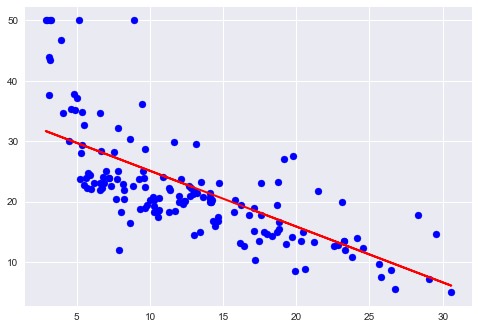

In [27]:
plt.scatter(test_data["LSTAT"], test_data["MEDV"], color='blue')
plt.plot(test_data["LSTAT"], price_pred, color='red', linewidth=2)

### Handling Numerical Values (Min-Max Scaler)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
mx = MinMaxScaler()

In [64]:
Model_LR["MX_MEDV"] = mx.fit_transform(Model_LR[["MEDV"]])
Model_LR.head()

,LSTAT,MEDV,SC_MEDV,SC_LSTAT,MX_MEDV,MX_LSTAT
0,4.98,24.0,0.159686,-1.075562,0.422222,-1.075562
1,9.14,21.6,-0.101524,-0.492439,0.368889,-0.492439
2,4.03,34.7,1.324247,-1.208727,0.660000,-1.208727
3,2.94,33.4,1.182758,-1.361517,0.631111,-1.361517
4,5.33,36.2,1.487503,-1.026501,0.693333,-1.026501


In [65]:
Model_LR["MX_LSTAT"] = mx.fit_transform(Model_LR[["LSTAT"]])
Model_LR.head()

,LSTAT,MEDV,SC_MEDV,SC_LSTAT,MX_MEDV,MX_LSTAT
0,4.98,24.0,0.159686,-1.075562,0.422222,0.089680
1,9.14,21.6,-0.101524,-0.492439,0.368889,0.204470
2,4.03,34.7,1.324247,-1.208727,0.660000,0.063466
3,2.94,33.4,1.182758,-1.361517,0.631111,0.033389
4,5.33,36.2,1.487503,-1.026501,0.693333,0.099338


In [66]:
Model_LR2 = Model_LR.loc[:, ["MX_LSTAT", "MX_MEDV"]]
Model_LR2.head()

,MX_LSTAT,MX_MEDV
0,0.089680,0.422222
1,0.204470,0.368889
2,0.063466,0.660000
3,0.033389,0.631111
4,0.099338,0.693333


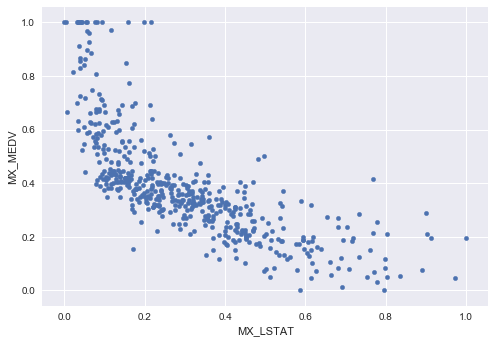

In [67]:
Model_LR2.plot.scatter(x = "MX_LSTAT", y= "MX_MEDV")
plt.tight_layout
plt.show()

In [75]:
train_data2, test_data2 = train_test_split(Model_LR2, test_size=1/3, random_state=20)

In [76]:
train_target2 = train_data2["MX_MEDV"]
train_feature2 = train_data2.drop(["MX_MEDV"], axis=1)

In [77]:
test_target2 = test_data2["MX_MEDV"]
test_feature2 = test_data2.drop(["MX_MEDV"], axis=1)

In [78]:
lr_model = LinearRegression()

In [79]:
# training process for building Linear Regression
lr_model.fit(train_feature2, train_target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
accuracy_score2 = lr_model.score(test_feature2, test_target2)

In [81]:
print(f'Accuracy: {accuracy_score2 * 100:.2f}')

Accuracy: 52.94


In [82]:
price_pred2 = lr_model.predict(test_feature2)

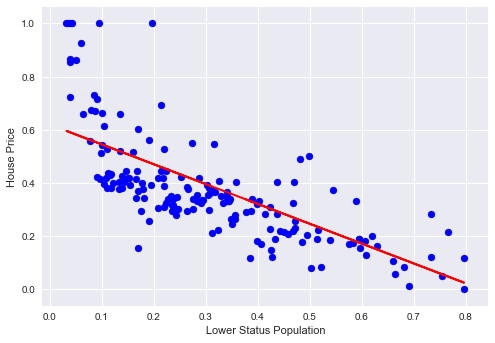

In [119]:
plt.scatter(test_data2["MX_LSTAT"], test_data2["MX_MEDV"], color='blue')
plt.plot(test_data2["MX_LSTAT"], price_pred2, color='red', linewidth=2)
plt.xlabel("Lower Status Population")
plt.ylabel("House Price")
plt.show()

In [96]:
print('Coefficient:', lr_model.coef_[0])
print('Intercept:', lr_model.intercept_)

Coefficient: -0.7465830796034837
Intercept: 0.6191871326154881


#### y = -0.7465830796034837x - 0.6191871326154881

In [97]:
test_feature2["MX_LSTAT"]

498    0.308775
94     0.244481
150    0.341336
221    0.544426
423    0.594923
         ...   
378    0.605960
348    0.117550
89     0.109547
21     0.333885
128    0.376932
Name: MX_LSTAT, Length: 169, dtype: float64

In [98]:
price_pred2

array([0.38866107, 0.43666158, 0.36435179, 0.21272786, 0.17502788,
       0.48466209, 0.1791481 , 0.02464001, 0.38618894, 0.43068727,
       0.46014681, 0.29224802, 0.52813037, 0.40802608, 0.45293643,
       0.53595878, 0.49310853, 0.28338956, 0.27700322, 0.35260918,
       0.59034562, 0.59549589, 0.4733315 , 0.47745171, 0.37650643,
       0.53163255, 0.44345993, 0.51329759, 0.39257527, 0.51947791,
       0.24733767, 0.36373376, 0.36084961, 0.05636567, 0.54502325,
       0.43583754, 0.54934948, 0.53781287, 0.43727961, 0.57180465,
       0.17399783, 0.26835077, 0.30028244, 0.32232559, 0.45911675,
       0.45520255, 0.46344298, 0.5192719 , 0.12579131, 0.12352519,
       0.57407077, 0.51844786, 0.16472734, 0.59075764, 0.23353495,
       0.4428419 , 0.32850592, 0.35322721, 0.29224802, 0.35219716,
       0.49537465, 0.40225778, 0.39133921, 0.45540856, 0.32108953,
       0.26752673, 0.48589816, 0.37794851, 0.3624977 , 0.26649667,
       0.5555298 , 0.43789764, 0.51515169, 0.49619869, 0.33015

In [99]:
y = -0.7465830796034837 * 0.308775 - 0.6191871326154881
y

-0.8497133230200538

## Linear Regression Hubungan Jumlah Ruangan dan Harga

In [121]:
Model_LR3 = df_housing.loc[:, ["RM", "MEDV"]]
Model_LR3

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


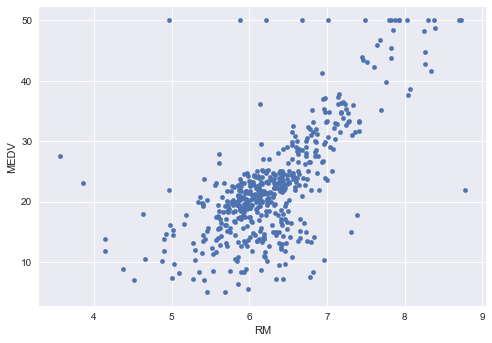

In [122]:
Model_LR3.plot.scatter(x = "RM", y= "MEDV")
plt.tight_layout
plt.show()

In [136]:
train_data3, test_data3 = train_test_split(Model_LR3, test_size=0.3, random_state=20)

In [137]:
print('Total Training: ', train_data3.shape)
print('Total Testing: ', test_data3.shape)

Total Training:  (354, 2)
Total Testing:  (152, 2)


In [138]:
train_target3 = train_data3["MEDV"]
train_feature3 = train_data3.drop(["MEDV"], axis=1)

In [139]:
test_target3 = test_data3["MEDV"]
test_feature3 = test_data3.drop(["MEDV"], axis=1)

In [140]:
test_data3

,RM,MEDV
498,6.019,21.2
94,6.249,20.6
150,6.122,21.5
221,6.164,21.7
423,6.103,13.4
...,...,...
104,6.167,20.1
418,5.957,8.8
110,6.195,21.7
309,5.972,20.3


In [141]:
lr_model = LinearRegression()

In [142]:
# training process for building Linear Regression
lr_model.fit(train_feature3, train_target3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
accuracy_score3 = lr_model.score(test_feature3, test_target3)
print(f'Accuracy: {accuracy_score3 * 100:.2f}')

Accuracy: 32.24


In [144]:
price_pred3 = lr_model.predict(test_feature3)

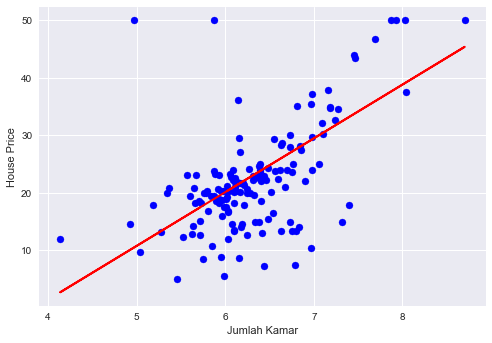

In [145]:
plt.scatter(test_data3["RM"], test_data3["MEDV"], color='blue')
plt.plot(test_data3["RM"], price_pred3, color='red', linewidth=2)
plt.xlabel("Jumlah Kamar")
plt.ylabel("House Price")
plt.show()

### SVM